# prac5

In [16]:
import os
import numpy as np
import pandas as pd
#加载三个包

In [17]:
print(pd.__version__)#查看版本号

1.4.3


In [18]:
#设置下载链接
host = 'https://orca.casa.ucl.ac.uk'
path = '~jreades/data/2022-09-10-listings.csv.gz'
url  = f'{host}/{path}'#把这俩合起来变成完整的下载地址，为啥要切开？
# your code here
df = pd.read_csv(url, compression='gzip', low_memory=False)#压缩为gzip
#定义df等于使用pandas的读csv函数，传入url参数，压缩为gizp格式
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")#rows x 75 columns,
#执行df.shape会返回一个元组，该元组的第一个元素代表行数，第二个元素代表列数，这就是这个数据的基本形状


Data frame is 69,351 x 75


In [19]:
#df.describe(): 主要介绍数据集各列的数据统计情况（最大值、最小值、标准偏差、分位数等等）。
#df.memory_usage(index=True, deep=False)-- 每列的内存使用细节
df.describe(percentiles=[0.05,0.95]) # 0.5 is always shown显示5%和95%的百分位数

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.935100e+04,6.935100e+04,6.935100e+04,69346.000000,69346.000000,0.0,69351.000000,69351.000000,69351.000000,0.0,...,51515.000000,51548.000000,51517.000000,51514.000000,0.0,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000
mean,1.373703e+17,2.022091e+13,1.242124e+08,31.047112,54.256035,NaN,51.509544,-0.128489,3.075255,NaN,...,4.790880,4.803499,4.739017,4.620849,NaN,11.987498,9.001355,2.811437,0.031391,0.882593
std,2.651479e+17,6.796924e-01,1.377104e+08,180.459655,336.219638,NaN,0.049182,0.100957,1.940233,NaN,...,0.454214,0.453838,0.420715,0.519731,NaN,37.148839,31.697957,15.762046,0.506464,1.274510
min,1.391300e+04,2.022091e+13,4.775000e+03,1.000000,1.000000,NaN,51.272480,-0.523600,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
5%,4.530436e+06,2.022091e+13,2.125620e+06,1.000000,1.000000,NaN,51.420590,-0.300245,1.000000,NaN,...,4.000000,4.000000,4.000000,3.840000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
50%,3.395467e+07,2.022091e+13,6.010350e+07,2.000000,2.000000,NaN,51.513600,-0.126200,2.000000,NaN,...,4.950000,4.980000,4.860000,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
95%,6.843427e+17,2.022091e+13,4.401124e+08,76.000000,144.000000,NaN,51.587600,0.026395,7.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,57.000000,44.000000,7.000000,0.000000,3.290000
max,7.123951e+17,2.022091e+13,4.788540e+08,2157.000000,23950.000000,NaN,51.708930,0.305150,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,285.000000,282.000000,219.000000,19.000000,51.330000


In [20]:
df.info(verbose=True)#查看df数据库的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

In [22]:
mem_usage = df.memory_usage(index=True, deep=True)
mem_usage#内存使用

Index                                               128
id                                               554808
listing_url                                     6656141
scrape_id                                        554808
last_scraped                                    4646517
                                                 ...   
calculated_host_listings_count                   554808
calculated_host_listings_count_entire_homes      554808
calculated_host_listings_count_private_rooms     554808
calculated_host_listings_count_shared_rooms      554808
reviews_per_month                                554808
Length: 76, dtype: int64

In [23]:
print(df.columns.to_list())#怎么做？打印列表

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [24]:
path = os.path.join('data','raw') # A default location to save raw data#在当前系统路径下继续加入data/raw
fn   = url.split('/')[-1]         # What does this do?split()方法是将指定字符串按某指定的分隔符进行拆分，取了url倒数第一个/前面的部分
print(f"Writing to: {fn}")#仅打印，无实际效果

Writing to: 2022-09-10-listings.csv.gz


In [25]:
if not os.path.exists(path):      # And what does *this* do?判断括号里的文件是否存在
    print(f"Creating {path} under {os.getcwd()}")#path为定义好的路径，fn为文件名，under {os.getcwd()为取当前路径
    os.makedirs(path)#在当前路径下创建data/raw文件夹
    
df.to_csv(os.path.join(path,fn), index=False)#df.to_csv保存为文件，保存在os.path.join两个参数，一个路径一个文件名
print("Done.")

Done.


In [26]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 
        'host_since', 'host_location', 'host_about', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'license', 'reviews_per_month']

In [30]:
del(df) # Check we've deleted the original object初始化下df，删除之前的df

In [31]:
testing = True

if testing:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=cols, nrows=10000)
    #如果测试为真，加载指定行和列，先前设置了为真，所以肯定要df加载为读csv中的指定行列
else:
    df = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=cols)#如果测试为假，加载指定列和全部行

print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")#数据范围为X行X列


Data frame is 10,000 x 34


In [32]:
df.sample(6)#随机抽样3行

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
8260,9410201.0,https://www.airbnb.com/rooms/9410201,2022-09-10,Persian Host Family (Room 4),A single bedroom in a well decorated mid terra...,39496238.0,Mary,2015-07-25,"London, United Kingdom",I am a retired chef. Originally Iranian. Liv...,...,$37.00,2,90.0,77.0,186.0,2015-12-20,2022-08-31,4.82,NaN,2.27
6275,7523829.0,https://www.airbnb.com/rooms/7523829,2022-09-11,London luxury apartment,"Single room with beautiful view, seperate mode...",39426732.0,子扶,2015-07-24,"London, United Kingdom",NaN,...,$30.00,7,40.0,0.0,1.0,2015-07-30,2015-07-30,0.00,NaN,0.01
9881,11093099.0,https://www.airbnb.com/rooms/11093099,2022-09-11,Bright and spacious double room in renovated flat,"Welcome to our home, a bright north London apa...",2296081.0,Renato & Emma,2012-05-05,"London, United Kingdom",A Brazilian-british family with a love for tra...,...,$70.00,6,1125.0,60.0,0.0,NaN,NaN,NaN,NaN,NaN
9956,11309823.0,https://www.airbnb.com/rooms/11309823,2022-09-11,Fantastic 2 Bed Roof Terrace Flat near Greenwich,"Central, sunny 2 bedroom penthouse apartment w...",14073545.0,Fabio,2014-04-09,"London, United Kingdom",NaN,...,$95.00,4,90.0,0.0,56.0,2016-03-25,2020-03-19,4.88,NaN,0.71
8150,9332579.0,https://www.airbnb.com/rooms/9332579,2022-09-11,"New, gym, Croydon Optic Wifi, 25 mins to London",Saffron Square is designed for urban living an...,13326068.0,Henry,2014-03-20,"London, United Kingdom","finance guy, clean and tidy, care for details...",...,$88.00,10,90.0,133.0,18.0,2017-03-29,2022-07-17,4.71,NaN,0.27
8090,9310737.0,https://www.airbnb.com/rooms/9310737,2022-09-11,1 bedroom flat in Central London,Spacious and bright 1 bedroom flat in amazing ...,9828819.0,Alexia,2013-11-05,"London, United Kingdom",I am a French 30 year old young professional w...,...,$89.00,2,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [33]:
df.sample(3)[['latitude', 'longitude', 'license', 'property_type', 'room_type' ,'price']]#在这几列中随机三行抽样

,latitude,longitude,license,property_type,room_type,price
9024,51.51137,-0.18358,NaN,Entire rental unit,Entire home/apt,$89.00
2538,51.47942,-0.11192,NaN,Entire townhouse,Entire home/apt,$150.00
5054,51.48176,-0.03105,NaN,Entire rental unit,Entire home/apt,$51.00


In [34]:
df.loc[[4552, 4554, 4556, 4557],['latitude','longitude','property_type','room_type','price']]
#选出指定行和列

,latitude,longitude,property_type,room_type,price
4552,51.49175,-0.14570,Entire rental unit,Entire home/apt,$259.00
4554,51.40027,-0.12673,Private room in home,Private room,$50.00
4556,51.44927,-0.10093,Entire home,Entire home/apt,$250.00
4557,51.45593,-0.11379,Entire rental unit,Entire home/apt,$70.00


In [35]:
df.iloc[4552:4557,14:19]#iloc可以用下标切片
#使用iloc切片出指定行段和列段

,latitude,longitude,property_type,room_type,accommodates
4552,51.49175,-0.14570,Entire rental unit,Entire home/apt,5.0
4553,51.51810,-0.19685,Private room in rental unit,Private room,3.0
4554,51.40027,-0.12673,Private room in home,Private room,2.0
4555,51.46185,-0.14771,Entire rental unit,Entire home/apt,2.0
4556,51.44927,-0.10093,Entire home,Entire home/apt,10.0


In [36]:
df.set_index('listing_url').loc[#设置索引为listing_url
    [f'https://www.airbnb.com/rooms/{x}' for x in [13913,15400,284532]], #筛选行，指定这三行# <- Try running this list comprehension separately!
    ['latitude','longitude','property_type','room_type','price']]#指定这几列

,latitude,longitude,property_type,room_type,price
listing_url,,,,,
https://www.airbnb.com/rooms/13913,51.56861,-0.11270,Private room in rental unit,Private room,$50.00
https://www.airbnb.com/rooms/15400,51.48780,-0.16813,Entire rental unit,Entire home/apt,$75.00
https://www.airbnb.com/rooms/284532,51.52851,-0.07426,Entire rental unit,Entire home/apt,$90.00


In [38]:
df.set_index('listing_url').iloc[0:3,13:18]
#0到3行，13到18列 # <- Notice change in indexing b/c 'listing_url' is no longer a column, it's the index now!

,latitude,longitude,property_type,room_type,accommodates
listing_url,,,,,
https://www.airbnb.com/rooms/13913,51.56861,-0.11270,Private room in rental unit,Private room,1.0
https://www.airbnb.com/rooms/15400,51.48780,-0.16813,Entire rental unit,Entire home/apt,2.0
https://www.airbnb.com/rooms/284532,51.52851,-0.07426,Entire rental unit,Entire home/apt,2.0


In [39]:
df.set_index('listing_url').iloc[0:3].latitude.mean()#设置索引listing_url的第前三行的latitute的平均值

51.52830666666667

In [40]:
df.sample(3)[['latitude','longitude','license','review_scores_rating','price']]#该几列的三个抽样行

,latitude,longitude,license,review_scores_rating,price
2120,51.480461,-0.201287,NaN,5.0,$990.00
5071,51.537090,-0.024470,NaN,NaN,$38.00
2429,51.469360,-0.126080,NaN,4.8,$111.00


In [43]:
df[df.price.isna()]#“ISNA函数是用来检测一个值为#N/A的问题,返回TRUE或FALSE，套上df[]后就指定到空值行

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,"London, United Kingdom",Michelle McLaughlin - A professional who work...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df[df.room_type.isna()]#“ISNA函数是用来检测一个值为#N/A的问题,返回TRUE或FALSE，套上df[]后就指定到空值行

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,"London, United Kingdom",Michelle McLaughlin - A professional who work...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df[~(df.price.str.startswith('$', na=False))]#startswitch()用于检测字符串是否以指定字符串开头。如果是则返回True，否则返回False.
#套上df[]后就指定到以指定字符串开头行，是吗？没看到啊

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,...,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
9103,10128178.0,https://www.airbnb.com/rooms/10128178,2022-09-11,Homely flat in Central Haggerston/Shoreditch,This is a lived in apartment with two medium s...,233649.0,Michelle,2010-09-13,"London, United Kingdom",Michelle McLaughlin - A professional who work...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9104,NaN,within an hour,82%,https://a0.muscache.com/im/pictures/user/652bf...,https://a0.muscache.com/im/pictures/user/652bf...,3.0,t,t,"London, England, United Kingdom",Hackney,...,104,2022-09-11,10.0,NaN,2.0,0,0.16,NaN,NaN,NaN


In [49]:
df[df.id.isna()][['id','listing_url','name','description','host_id','host_name','price']]
#选出这几列中为空值的行？不明其意

,id,listing_url,name,description,host_id,host_name,price


In [50]:
df.drop(df[df.id.isna()].index.array, axis=0, inplace=True)#drop删除含有指定元素的行或列，或删除指定行，列，删除id是空的行，axis=0指的是列

In [53]:
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]
#df.isnull():该方法用于判断dataframe是否存在缺失值，该方法返回一个由True和False构成的dataframe，若原数据为NaN，返回True，否则返回False
#第一行代码是计算axis为0时（列）df空值计数，并按由高到低排列，看12个

reviews_per_month            2192
last_review                  2192
review_scores_rating         2192
first_review                 2192
host_location                 558
bedrooms                      269
beds                          117
bathrooms_text                 73
description                    27
name                           16
host_total_listings_count       6
host_listings_count             6
dtype: int64

In [54]:
df.drop(columns=['bathrooms','license','host_about'], inplace=True)#删除这三列
#inplace=False(默认)表示原数组不变,对数据进行修改之后结果给新的数组。 inplace=True表示直接在原数组上对数据进行修改

KeyError: "['bathrooms', 'license', 'host_about'] not found in axis"

In [57]:
df.isnull().sum(axis=1).sort_values(ascending=False).head(20)#计算行为空值的前20个进行排序，axis=1是行

9103    22
7415     9
6959     9
6365     9
5697     9
4511     9
2451     8
590      7
457      7
1307     7
845      7
842      7
369      7
679      7
637      7
751      6
724      6
706      6
4965     6
6991     6
dtype: int64

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

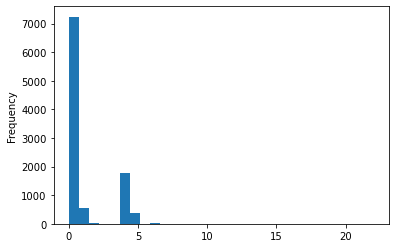

In [58]:
probs = df.isnull().sum(axis=1)#df的行空值计数

print(type(probs))       # Note that this has returned a series!
probs.plot.hist(bins=30) # Oooooooh, check out what we can do with a series!

In [60]:
df.drop(probs[probs > 5].index, inplace=True)#删除(probs空值计数值大于5的行取下标)，自身替换为真

KeyError: '[209, 312, 369, 384, 398, 457, 464, 572, 590, 611, 637, 647, 679, 685, 706, 714, 716, 724, 740, 751, 758, 777, 778, 795, 820, 832, 842, 845, 885, 926, 1181, 1307, 1678, 1928, 2451, 2486, 3396, 4511, 4965, 5697, 6365, 6959, 6991, 7415, 7775, 7803, 7962, 8680, 9040, 9103, 9728] not found in axis'

In [61]:
print(f"Have reduced data frame to: {df.shape[0]} rows and {df.shape[1]} columns")#使用shape描述出行数列数

Have reduced data frame to: 9948 rows and 31 columns


In [63]:
from pandas_profiling import ProfileReport#可以快速生成报告，一览变量概况，加载该包
profile = ProfileReport(df[['latitude','longitude','review_scores_rating']], title="Pandas Profiling Report")#要用双重括号
#生成报告，这三列的数据

In [65]:
profile.to_notebook_iframe()
# You can also write this profile to a web page:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
rtm = df.room_type.memory_usage(deep=True) # Room Type Memory，rtm定义为room_type的内存使用量
ctm = df.room_type.astype('category').memory_usage(deep=True) # Categorical Type Memory，ctm定义为room_type的目录的内存使用量

print(f"The raw memory usage of `room_type` is {rtm/1000:,.0f} Kb.")
print(f"The categorical memory usage of `room_type` is {ctm/1000:,.0f} Kb.")
print(f"That's {(ctm/rtm)*100:.0f}% of the original!")

The raw memory usage of `room_type` is 1,046 Kb.
The categorical memory usage of `room_type` is 354 Kb.
That's 34% of the original!


In [67]:
shm = df.host_is_superhost.memory_usage(deep=True) # Super Host Memory
bhm = df.host_is_superhost.replace({'f':False, 't':True}).astype('bool').memory_usage(deep=True) # Boolean Host Memory

print(f"The raw memory usage of `host_is_superhost` is {shm/1000:,.0f} Kb.")
print(f"The boolean memory usage of `host_is_superhost` is {bhm/1000:,.0f} Kb.")
print(f"That's {(bhm/shm)*100:.0f}% of the original!")

The raw memory usage of `host_is_superhost` is 921 Kb.
The boolean memory usage of `host_is_superhost` is 354 Kb.
That's 38% of the original!


In [73]:
bools = ['host_is_superhost']#设置布尔值等于这列
df.sample(5, random_state=43)[bools]#抽样五行


,host_is_superhost
6962,False
7182,False
5592,True
8624,False
9307,True


In [77]:
# This approach requires us to map 't' 
# and 'f' to True and False
for b in bools:
    print(f"Converting {b}")#转换该列，b是列名
    df[b] = df[b].replace({'f':False, 't':True}).astype('bool')#将该列中的f和t替换为布尔值的False和True

Converting host_is_superhost


In [79]:
df.sample(5, random_state=43)[bools]#抽样五行，bools在前面已经设置为host_is_superhost这列

,host_is_superhost
6962,False
7182,False
5592,True
8624,False
9307,True


In [80]:
dates = ['last_scraped','host_since','first_review','last_review']#设置一个日期列表
df.sample(5, random_state=43)[dates]#抽样五行，dates这四列

,last_scraped,host_since,first_review,last_review
6962,2022-09-11,2015-05-11,NaN,NaN
7182,2022-09-11,2015-09-03,2015-10-19,2017-08-07
5592,2022-09-11,2014-09-29,2015-10-14,2022-08-23
8624,2022-09-11,2014-06-13,NaN,NaN
9307,2022-09-11,2016-01-09,2016-04-25,2022-08-30


In [81]:
for d in dates:
    print("Converting " + d)#每一列打印
    df[d] = pd.to_datetime(df[d], infer_datetime_format=True)#每一列转为日期格式

Converting last_scraped
Converting host_since
Converting first_review
Converting last_review


In [82]:
df.sample(5, random_state=43)[dates]

,last_scraped,host_since,first_review,last_review
6962,2022-09-11,2015-05-11,NaT,NaT
7182,2022-09-11,2015-09-03,2015-10-19,2017-08-07
5592,2022-09-11,2014-09-29,2015-10-14,2022-08-23
8624,2022-09-11,2014-06-13,NaT,NaT
9307,2022-09-11,2016-01-09,2016-04-25,2022-08-30


In [85]:
print(df[dates[1]].dtype, "\n")#打印df的（前面定义好的dates向量的下标1为host_since）列的属性为datetime64
df.sample(5, random_state=45)[dates[1]].dt.strftime('%A %B %d, %Y')#抽样5个，列是host_since，该列内容使用dt.strftime函数转为指定日期格式

datetime64[ns] 



3808    Saturday December 13, 2014
3596     Friday September 02, 2011
8577          Tuesday May 22, 2012
3534     Saturday October 18, 2014
8978      Friday December 11, 2015
Name: host_since, dtype: object

In [86]:
cats = ['property_type','room_type']#定义一组列表，两个列名
df.sample(5, random_state=42)[cats]#在该两列列表中抽样五行

,property_type,room_type
2971,Entire rental unit,Entire home/apt
7446,Private room in rental unit,Private room
6900,Private room in home,Private room
1284,Private room in rental unit,Private room
3475,Private room in rental unit,Private room


In [87]:
df[cats[0]].value_counts()#property_type列中每一类的数值计数

Entire rental unit                    3907
Private room in rental unit           2374
Private room in home                  1549
Entire home                            821
Private room in townhouse              283
Entire condo                           246
Private room in condo                  183
Entire townhouse                       161
Entire loft                             77
Private room in loft                    44
Private room in bed and breakfast       34
Entire serviced apartment               34
Shared room in rental unit              33
Private room                            23
Entire guest suite                      17
Shared room in home                     16
Room in boutique hotel                  14
Room in serviced apartment              13
Private room in guesthouse              12
Private room in guest suite             11
Entire guesthouse                        8
Entire cottage                           8
Shared room in bed and breakfast         7
Boat       

In [88]:
df[cats[1]].value_counts()#room_type列的每一类数值计数
#指定列里有多少个不同的数据值，并计算每个不同值有在该列中的个数，同时还能根据需要进行排序。

Entire home/apt    5306
Private room       4560
Shared room          63
Hotel room           19
Name: room_type, dtype: int64

In [89]:
cats = ['property_type','room_type']
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')#df的cats两列转为分类数据，astype()用于转换数据类型
    
print(df[cats[1]].cat.categories.values)#room_type的分类值有四种

Converting property_type
Converting room_type
['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [90]:
df.sample(5, random_state=42)[cats]#看看抽样五行结果

,property_type,room_type
2971,Entire rental unit,Entire home/apt
7446,Private room in rental unit,Private room
6900,Private room in home,Private room
1284,Private room in rental unit,Private room
3475,Private room in rental unit,Private room


In [91]:
money = ['price']
df.sample(5, random_state=42)[money]

,price
2971,$177.00
7446,$30.00
6900,$57.00
1284,$40.00
3475,$22.00


In [93]:
for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','', regex=False).str.replace(",","").astype('float')
    #转换'$'为空，转换逗号为空

Converting price


In [94]:
df.sample(5, random_state=42)[money]#在看看转换后的

,price
2971,177.0
7446,30.0
6900,57.0
1284,40.0
3475,22.0


In [98]:
df.sort_values(by=money[0], ascending=False).head(10)[['id','name','price','minimum_nights']]
#排序值前十个，这四列，money就一列，所以只能是0，单独写money也行

,id,name,price,minimum_nights
8194,9470827.0,"Room in a cosy flat. Central, clean",8000.0,2
9313,10475894.0,Spacious Private Ground Floor Room,7693.0,1
9587,10914219.0,Flawless Hideout,6766.0,2
5848,7050088.0,Stylish Apartment Moments from Tower Bridge an...,5500.0,30
2251,2851908.0,"Bright ,Modern, 12m to Bond street.",5500.0,45
6893,7974622.0,Amazing Victoria era flat,5000.0,1124
2199,2814755.0,HUGE DOUBLE ROOM WITH MEZZANINE,5000.0,300
7486,8710435.0,Bright airy large Victorian house,5000.0,7
1944,2070195.0,Orlando Magic,4286.0,2
7190,8303869.0,Old Victorian Building,4050.0,5


In [101]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count','accommodates',
         'beds','minimum_nights','maximum_nights','availability_365']#这些列表都是等待转为整数型
for i in ints:
    print(f"Converting {i}")#先把他们都打印出来
    try:#尝试将他们转为整数型
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:#出错的话打印这些
        print("  - !!!Converting to unsigned 16-bit integer!!!")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting accommodates
Converting beds
  - !!!Converting to unsigned 16-bit integer!!!
Converting minimum_nights
Converting maximum_nights
Converting availability_365


In [102]:
df.beds.isna().value_counts()#beds里空值是真的有85行

False    9863
True       85
Name: beds, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9948 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         9948 non-null   int64         
 1   listing_url                9948 non-null   object        
 2   last_scraped               9948 non-null   datetime64[ns]
 3   name                       9932 non-null   object        
 4   description                9922 non-null   object        
 5   host_id                    9948 non-null   int64         
 6   host_name                  9948 non-null   object        
 7   host_since                 9948 non-null   datetime64[ns]
 8   host_location              9418 non-null   object        
 9   host_is_superhost          9948 non-null   bool          
 10  host_listings_count        9948 non-null   int64         
 11  host_total_listings_count  9948 non-null   int64         
 12  host_v

In [104]:
path = os.path.join('data','clean')#路径等于在当前路径下新增data/clean

if not os.path.exists(path):#如果路径不存在
    print(f"Creating {path} under {os.getcwd()}")#输出创建路径，取当前路径
    os.makedirs(path)#创建路径
    
df.to_csv(os.path.join(path,fn), index=False)#导出到csv文件，path为路径，fn为文件名
print("Done.")

Creating data/clean under /home/jovyan/work/NOTE
Done.


In [105]:
df.reset_index().to_feather(os.path.join(path,fn.replace('.csv.gz','.feather')))#重新设置索引，转为Feather格式（在原路径下），替换后缀名

In [106]:
df.select_dtypes(include=[int,float])#选择格式为int和float的行

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,13913,54730,3,4,51.56861,-0.11270,1,1.0,50.0,1,29,343,30.0,4.90,0.20
1,15400,60302,1,12,51.48780,-0.16813,2,1.0,75.0,3,50,70,89.0,4.79,0.57
2,284532,1481412,1,3,51.52851,-0.07426,2,NaN,90.0,5,365,222,42.0,4.32,0.34
3,106332,264345,2,5,51.52874,-0.05396,1,1.0,55.0,3,365,74,65.0,4.84,0.47
4,17402,67564,6,32,51.52195,-0.14094,6,3.0,379.0,4,365,249,51.0,4.74,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11557513,23110331,1,2,51.50057,-0.07464,2,1.0,150.0,1,5,362,2.0,5.00,0.03
9996,11351055,20636515,2,2,51.55097,-0.03219,1,1.0,25.0,2,10,0,2.0,5.00,0.03
9997,11351214,5021232,1,1,51.51980,-0.10434,2,1.0,136.0,1,1125,0,0.0,NaN,NaN
9998,11447473,17535901,1,1,51.52918,-0.10267,2,1.0,92.0,2,1125,0,9.0,4.57,0.11


In [107]:
df.groupby('room_type')['property_type'].value_counts()
#groupby数据分组，以room_type为组，求property_type数量

room_type                                       
Entire home/apt  Entire rental unit                 3907
                 Entire home                         821
                 Entire condo                        246
                 Entire townhouse                    161
                 Entire loft                          77
                                                    ... 
Shared room      Private room in casa particular       0
                 Private room in chalet                0
                 Private room in condo                 0
                 Private room in cottage               0
                 Yurt                                  0
Name: property_type, Length: 228, dtype: int64

In [108]:
df[df.room_type=='Entire home/apt']['property_type'].value_counts().head(10)
#room_type为指定类型的，property_type的值计数

Entire rental unit           3907
Entire home                   821
Entire condo                  246
Entire townhouse              161
Entire loft                    77
Entire serviced apartment      34
Entire guest suite             17
Entire cottage                  8
Entire guesthouse               8
Boat                            7
Name: property_type, dtype: int64

In [109]:
print(f"The mean price is ${df.price.mean():0.2f}")#取价格的平均值保留两位小数
print(f"The median price is ${df.price.median():0.2f}")#取价格的中位数，保留两位小数

The mean price is $121.25
The median price is $80.00


In [110]:
pricey = df[(df.room_type=='Entire home/apt') & (df.price>121)]
#room_type是Entire home/apt类型的，并且价格大于121的这些行，等于pricey
print(f"Selected {pricey.shape[0]:,} rows")#计算有多少这些行，并输出

Selected 2,496 rows


In [111]:
df[df.price==df.price.min()][['price','id','listing_url','room_type','description']]#这五列取最小值

,price,id,listing_url,room_type,description
9924,10.0,11323463,https://www.airbnb.com/rooms/11323463,Private room,"Modern, well decorated house, two double bedro..."


In [ ]:
df[df.price==df.price.max()][['price','id','listing_url','room_type','description']]#这五列取最大值

In [112]:
dfr = df[ 
            (df.price > df.price.quantile(0.25)) & 
            (df.price < df.price.quantile(0.75)) ]

print(f"Lower Quartile: {df.price.quantile(0.25):>6.2f}")
print(f"Upper Quartile: {df.price.quantile(0.75):>6.2f}")
print()
print(f"Range selected contains {dfr.shape[0]:,} rows.")
print(f"Minimum price: {dfr.price.min():>6.2f}")
print(f"Maximum price: {dfr.price.max():>6.2f}")
#使用第 25 个和第 75 个百分位数来获得中间 50% 的数据

Lower Quartile:  48.00
Upper Quartile: 130.00

Range selected contains 4,894 rows.
Minimum price:  49.00
Maximum price: 129.00


In [115]:
df['z'] = (df.price - df.price.mean()) / df.price.std()#价格减去价格平均数，除以价格标准差，给到df的z列，该功能能创建一个新的z列
df.z.describe().apply(lambda x: f"{x:5.5f}")#lambda匿名函数，冒号前面的x表示函数参数
#pandas有两个核心数据结构Series和DataFrame，分别对应了一维的序列和二维的表结构，describe()函数就是返回这两个核心数据结构的统计变量

count    9948.00000
mean        0.00000
std         1.00000
min        -0.46015
25%        -0.30297
50%        -0.17061
75%         0.03620
max        32.58808
Name: z, dtype: object

In [116]:
df['iqs'] = (df.price - df.price.quantile(0.25))/(df.price.quantile(0.75)-df.price.quantile(0.25))#新建一个求四分位数的列iqs
#价格减去价格四分位数0.25的差值除以四分位数0.75减去四分位数0.25的差值
df.iqs.describe().apply(lambda x: f"{x:5.5f}")#使用describe()描述统计iqs内容

count    9948.00000
mean        0.89328
std         2.94839
min        -0.46341
25%         0.00000
50%         0.39024
75%         1.00000
max        96.97561
Name: iqs, dtype: object

In [117]:
df['lnprice'] = np.log(df.price)#新建一列inprice，对价格求对数
df.lnprice.describe().apply(lambda x: f"{x:5.5f}")#使用describe()描述统计inprices内容

count    9948.00000
mean        4.41530
std         0.75977
min         2.30259
25%         3.87120
50%         4.38203
75%         4.86753
max         8.98720
Name: lnprice, dtype: object

<AxesSubplot:ylabel='Frequency'>

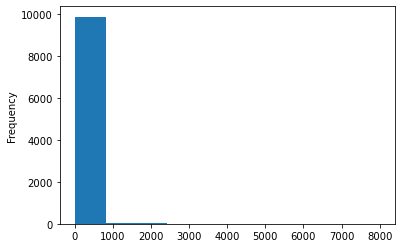

In [118]:
df.price.plot.hist() # histogram画出减价格列直方图

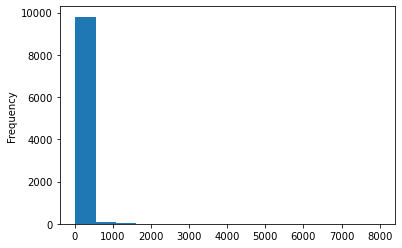

In [119]:
df.price.plot.hist(bins=15); # Notice the ';' here to suppress `<AxesSubplot...>`pandas画直方图

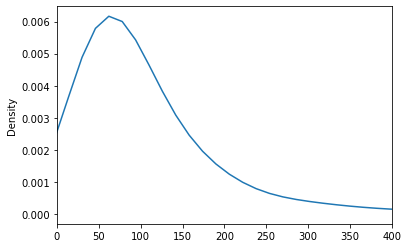

In [122]:
df.price.plot.kde(xlim=(0,400)); #kernel density estimate plot核密度图，0-400区间

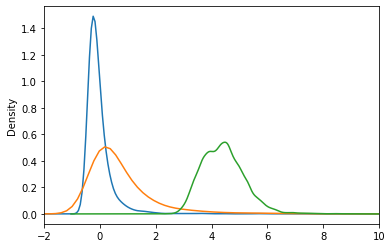

In [123]:
#三个数据叠加绘图
df.z.plot.kde(xlim=[-2, 10])#画z分数的核密度，区间2-10
df.iqs.plot.kde(xlim=[-2, 10])#画四分位数ips的核密度
df.lnprice.plot.kde();#inprice对核密度

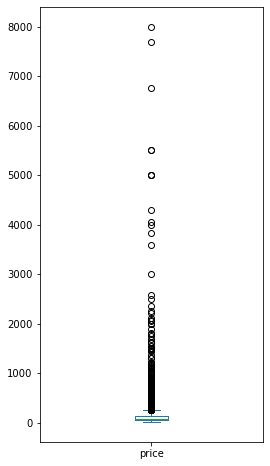

In [124]:
df.price.plot.box(figsize=(4, 8)); # boxplot画价格的箱线图，4和8指的是图的长宽尺寸

"\nx, y\xa0→ 散点的坐标，float or array-like, shape (n, )\ns\xa0→ 散点的面积，float or array-like, shape (n, ), optional\nc\xa0→ 散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )）\nmarker\xa0→ 散点样式（默认值为实心圆，'o'，其余样式同plt.plot( )）\nalpha\xa0→ 散点透明度（[0, 1]之间的数，0表示完全透明，1则表示完全不透明）\nlinewidths\xa0→散点的边缘线宽\nedgecolors\xa0→ 散点的边缘颜色\n"

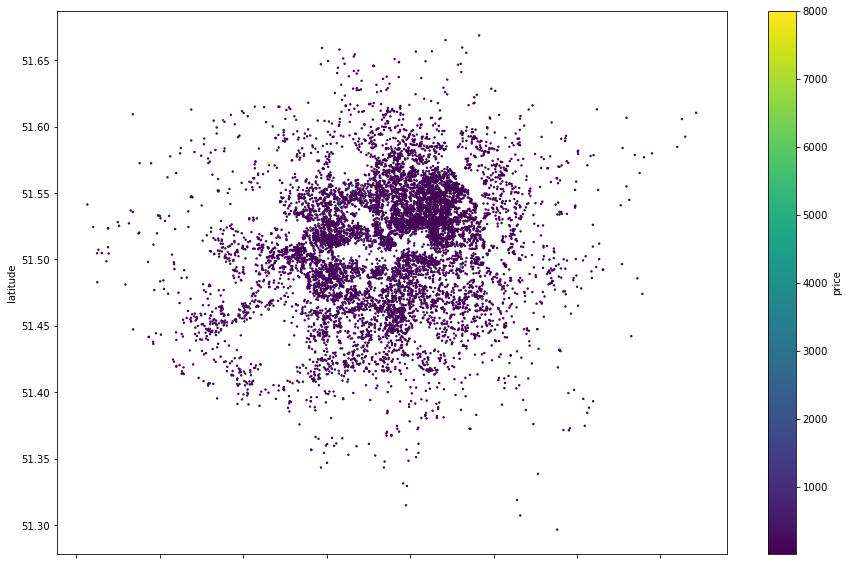

In [129]:
df.plot.scatter(x='longitude', y='latitude', c='price', s=2, cmap='viridis', figsize=(15,10))
#scatter散点图
#经度纬度做XY轴，c是画什么内容，画价格，s是点的大小
'''
x, y → 散点的坐标，float or array-like, shape (n, )
s → 散点的面积，float or array-like, shape (n, ), optional
c → 散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )）
marker → 散点样式（默认值为实心圆，'o'，其余样式同plt.plot( )）
alpha → 散点透明度（[0, 1]之间的数，0表示完全透明，1则表示完全不透明）
linewidths →散点的边缘线宽
edgecolors → 散点的边缘颜色
cmap → 指的是matplotlib.colors.Colormap，相当于多个调色盘的合集
norm、vmin、vmax → 散点颜色亮度设置
'''

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

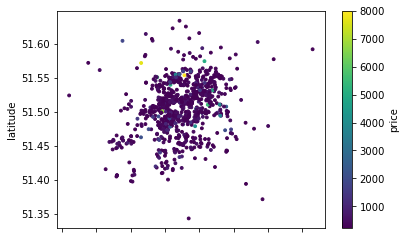

In [130]:
df[df.price > df.price.quantile(0.9)].plot.scatter(x='longitude', y='latitude', c='price', cmap='viridis', s=8)#画分位数

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

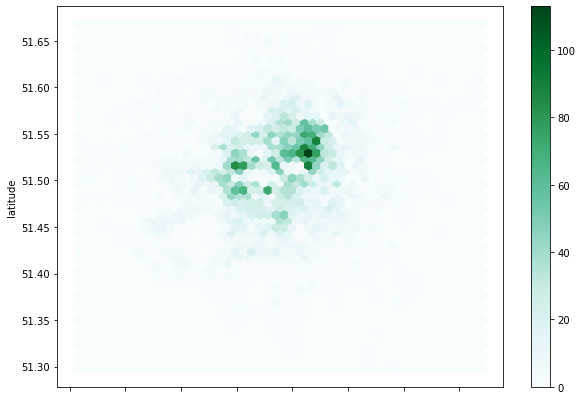

In [131]:
df.plot.hexbin(x='longitude', y='latitude', gridsize=50, figsize=(10,7))  
#hex bin plot hexbin蜂窝图,十六进制图